In [16]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
from time import time
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

def plot_importance(clf,X,y,figsize=(8,8)):
    clf.fit(X.values, y.values.ravel())
    feature_ip = pd.DataFrame({'feature_importance':clf.feature_importances_})    
    feature_ip['feature'] = X.columns
    feature_ip.sort_values(by='feature_importance', ascending=False, inplace=True)
    feature_ip = feature_ip.iloc[:50]
    feature_ip=feature_ip.sort_values(by='feature_importance', ascending=False)
    
    feature_ip.sort_values(by='feature_importance', inplace=True)
    feature_ip = feature_ip.set_index('feature', drop=True)
    feature_ip.plot.barh(title='Random Forest', figsize=figsize)
    plt.xlabel('Feature Importance Score')
    plt.show()
    return feature_ip

In [4]:
Traditional_features=['review_all_length',
                      'review_exceptstop_length','num_sentence',
                       'noun', 'adj', 'adv', 'verb','sentiment_score','BOW']
Readability_features=['error_num','fog_index','Flesch_reading_ease_score',
                     'SMOG_index','fog_index_simple','word_length']
Business_features=['business_review_count','business_avg_star', 'star_deviation','business_star']
Reviewer_features=['user_average_stars', 'user_fans', 'user_received_funny', 'user_received_cool',
       'user_received_useful','user_days_since','month']
Aspect_features=['environment_score', 'food_score', 'service_score','other_score','price_score']
Argumentation_features=[ 
        'fact', 'value',
       'testimony', 'policy',  'not_evidence_reason',
       'evidence_reason', 'relation_ratio', 'value_ratio', 'testimony_ratio',
       'policy_ratio', 'fact_ratio']
ALL_except_ABF=Traditional_features+Readability_features+Business_features+Reviewer_features+Aspect_features
ALL=ALL_except_ABF+Argumentation_features

In [2]:
df=pd.read_pickle('df_llll.pickle')
df.head()

,Unnamed: 0.1,Unnamed: 0.1.1,business_id,cool,date,funny,review_id,stars,text,type,...,testimony,policy,evidence_reson,not_evidence_reason,evidence_reason,relation_ratio,value_ratio,testimony_ratio,policy_ratio,fact_ratio
0,0,3657177,Ec9CBmL3285XkeHaNp-bSQ,0,2016-02-03,0.0,ngyVUWLxjNumTOTN-6HVtg,4.0,definitely worth it to drive off the strip to ...,review,...,0,0,0,6,0,0.000000,1.000000,0.000000,0.00,0.0
1,1,454416,b41zjWT4pzcTgNY04eKAvg,0,2016-08-06,0.0,K5DlV2-PifbmPutdHjJdJw,4.0,a great go to place for bubble tea in big beer...,review,...,0,1,2,10,2,0.166667,0.750000,0.000000,0.25,0.0
2,2,3691165,hDyc9DdjGldhxis5E1rd3w,0,2016-12-15,0.0,U1Rt2R7V39b_E9HeTQq-Mw,5.0,tried this place last night...food was amazing...,review,...,1,0,0,6,0,0.000000,0.666667,0.333333,0.00,0.0
3,3,3335922,vl2IZrNJEA8npSjqXbdwxw,0,2016-06-14,0.0,RoMrHR9FpF-n8gcei24XaQ,5.0,it's so mouthwatering good no matter how sweet...,review,...,0,0,5,1,5,0.833333,1.000000,0.000000,0.00,0.0
4,4,3434391,ICWQfTi_Dvo723ZJicR8Vw,0,2016-05-26,0.0,0SXbTh-OdHIff8Gcj8WyHA,4.0,"finally, a new filipino market on the west sid...",review,...,1,1,0,20,0,0.000000,0.600000,0.200000,0.20,0.0


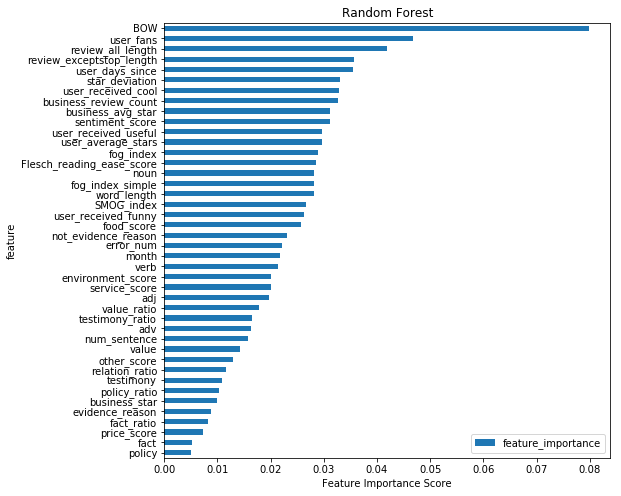

In [18]:
%matplotlib inline
clf=RandomForestClassifier(n_estimators=30)
df_result=plot_importance(clf,df[ALL],df.label)

In [20]:
df_result.ix[Aspect_features]

,feature_importance
feature,
environment_score,0.020112
food_score,0.025753
service_score,0.020046
other_score,0.012928
price_score,0.007292


In [21]:
df_result.ix[Argumentation_features]

,feature_importance
feature,
fact,0.005157
value,0.014263
testimony,0.010865
policy,0.004986
not_evidence_reason,0.023018
evidence_reason,0.008726
relation_ratio,0.011620
value_ratio,0.017919
testimony_ratio,0.016475
